In [1]:
import h2o
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 21 hours 18 mins
H2O cluster version:,3.14.0.1
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_avkashchauhan_x3crdh
H2O cluster total nodes:,1
H2O cluster free memory:,2.978 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [2]:
df = h2o.import_file("/Users/avkashchauhan/learn/customers/kc_house_data.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
df

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7.1293e+09,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6.4141e+09,20141209T000000,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
5.6315e+09,20150225T000000,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2.4872e+09,20141209T000000,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1.9544e+09,20150218T000000,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7.23755e+09,20140512T000000,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1.3214e+09,20140627T000000,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2.008e+09,20150115T000000,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2.4146e+09,20150415T000000,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
3.7935e+09,20150312T000000,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [46]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [5]:
X_list = df.columns

In [6]:
X_list.remove("price")

In [7]:
X_list

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [12]:
model = H2ORandomForestEstimator( ntrees = 5, max_depth = 5)

In [13]:
model.train(x = X_list, y = "price", training_frame=df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
pred_df = df[0,:]

In [30]:
ln = model.predict_leaf_node_assignment(pred_df)

In [31]:
ln

T1,T2,T3,T4,T5
LLLRR,LLLLR,LLLRL,LLLLL,LLLLL


In [32]:
print(ln.shape)
ln[0]

(1, 5)


T1
LLLRR


In [35]:
pred_df

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7.1293e+09,20141013T000000,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [39]:
ln = model.predict_leaf_node_assignment(df)

In [41]:
ln.shape

(21613, 5)

In [42]:
ndd = df

In [44]:
ln['y'] = df['price']

In [45]:
ln.show()

T1,T2,T3,T4,T5,y
LLLRR,LLLLR,LLLRL,LLLLL,LLLLL,221900
LRRRL,LRRLR,LLRLR,LLRLL,LLRRR,538000
LLRRR,LLLLR,LLLLR,LLRLR,LLRLL,180000
LLLRR,RLLLL,LLLRR,LLLLL,LLLLR,604000
LLRLR,LLRRR,LLRRL,LLRLL,LLRLL,510000
RLRLL,RRLRR,LRRLL,LRRLL,RRRLR,1.225e+06
LLLRL,LLRLL,LLRLL,LLLLR,LLLLR,257500
LLRLL,LLLLL,LLLRL,LLLLL,LLLLL,291850
LLRLL,LLLRR,LLLRR,LLLLL,LLLLR,229500
LLLRL,LLRLL,LLRLL,LLLLR,LLLLR,323000


In [47]:
model_glm = H2OGeneralizedLinearEstimator()

In [60]:
new_list = ln.columns
print(new_list)

['T1', 'T2', 'T3', 'T4', 'T5', 'y']


In [61]:
new_list = new_list.remove("y")


In [62]:
model_glm.train(x = new_list, y = "y", training_frame=ln)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [63]:
model_glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1502744993688_18


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 134136921384.28784
RMSE: 366247.07696347265
MAE: 233043.52569110517
RMSLE: 0.5460929092164266
R^2: 0.004742833788897838
Mean Residual Deviance: 134136921384.28784
Null degrees of freedom: 21612
Residual degrees of freedom: 21456
Null deviance: 2912916761921300.0
Residual deviance: 2899101281878613.0
AIC: 615422.0660845415
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-08-17 14:26:01,0.000 sec,0,2912916761921300.0000000,134776142225.5725861


In [65]:
print(model_glm.coef())

{'Intercept': 540930.4837024366, 'T1.LLLLL': -146.9628888513473, 'T1.LLLLR': -68.2838871879147, 'T1.LLLRL': -272.4004736055288, 'T1.LLLRR': -131.74439542095564, 'T1.LLRLL': -748.8286797457662, 'T1.LLRLR': -217.90310410184838, 'T1.LLRRL': -221.12073494917428, 'T1.LLRRR': 21.08740765501821, 'T1.LRLLL': 0.0, 'T1.LRLLR': 137.63895799384488, 'T1.LRLRL': 106.89002650631585, 'T1.LRLRR': 85.0108676436574, 'T1.LRRLL': -39.26512341805001, 'T1.LRRLR': 2.924403211728883, 'T1.LRRRL': 277.3169925861233, 'T1.LRRRR': 60.99717492563278, 'T1.RLLLL': 1.256772571823154, 'T1.RLLLR': 11.4632816887652, 'T1.RLLRL': 2.564107226433734, 'T1.RLLRR': 15.44644951807068, 'T1.RLRLL': 503.69311416638027, 'T1.RLRLR': 29.721207308275652, 'T1.RLRRL': 156.1616044793555, 'T1.RLRRR': 245.2076474945959, 'T1.RRLLL': 40.39772653988571, 'T1.RRLLR': 13.027638275524538, 'T1.RRLRL': 0.7186874093377638, 'T1.RRLRR': 1.4447750472950958, 'T1.RRRLL': 46.301755112384285, 'T1.RRRLR': 42.69661493428022, 'T1.RRRRL': 16.72962774431707, 'T1.

In [66]:
# We need to take a coef for each row and its rule (T3.RRRRL- - Means Tree 3 with rule RRRRL)  as Data frame
# Then generate a graph for each coef in ascending order to find the top values - 

# OR just use the H2O FLOW and load the above MODEL and use the Var importance Tree forthe model as result. 

In [18]:
mojo_file_name = "/Users/avkashchauhan/Downloads/drf_001.zip"
model.download_mojo(mojo_file_name)

'/Users/avkashchauhan/Downloads/drf_001.zip'

In [19]:
import subprocess
from IPython.display import Image
def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    result = subprocess.call(["java",  "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i",  mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else:    
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")
        

# -------------------        
# I had to do in 2 steps. If I put all in 1 step the process hung after graphviz is created. Still investigating
# -------------------
def displayTreeImage(gv_file_path, image_file_path):
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")
    
#Call above function with various parameters    

In [20]:
h2o_jar_path= '/Users/avkashchauhan/tools/h2o-3/h2o-3.14.0.1/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/Users/avkashchauhan/Downloads/drf_000.gv"
image_file_path = "/Users/avkashchauhan/Downloads/image_001.png"

In [21]:
# Note just change the tree id in the function below to get which particular tree you want
generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, 1)

Success: Graphviz file /Users/avkashchauhan/Downloads/drf_000.gv is generated.


In [24]:
displayTreeImage(gv_file_path, image_file_path)
# Note: If this step hangs, you can look at "dot" active process in osx and try killing it

Success: Image File /Users/avkashchauhan/Downloads/image_001.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/Users/avkashchauhan/Downloads/image_001.png')


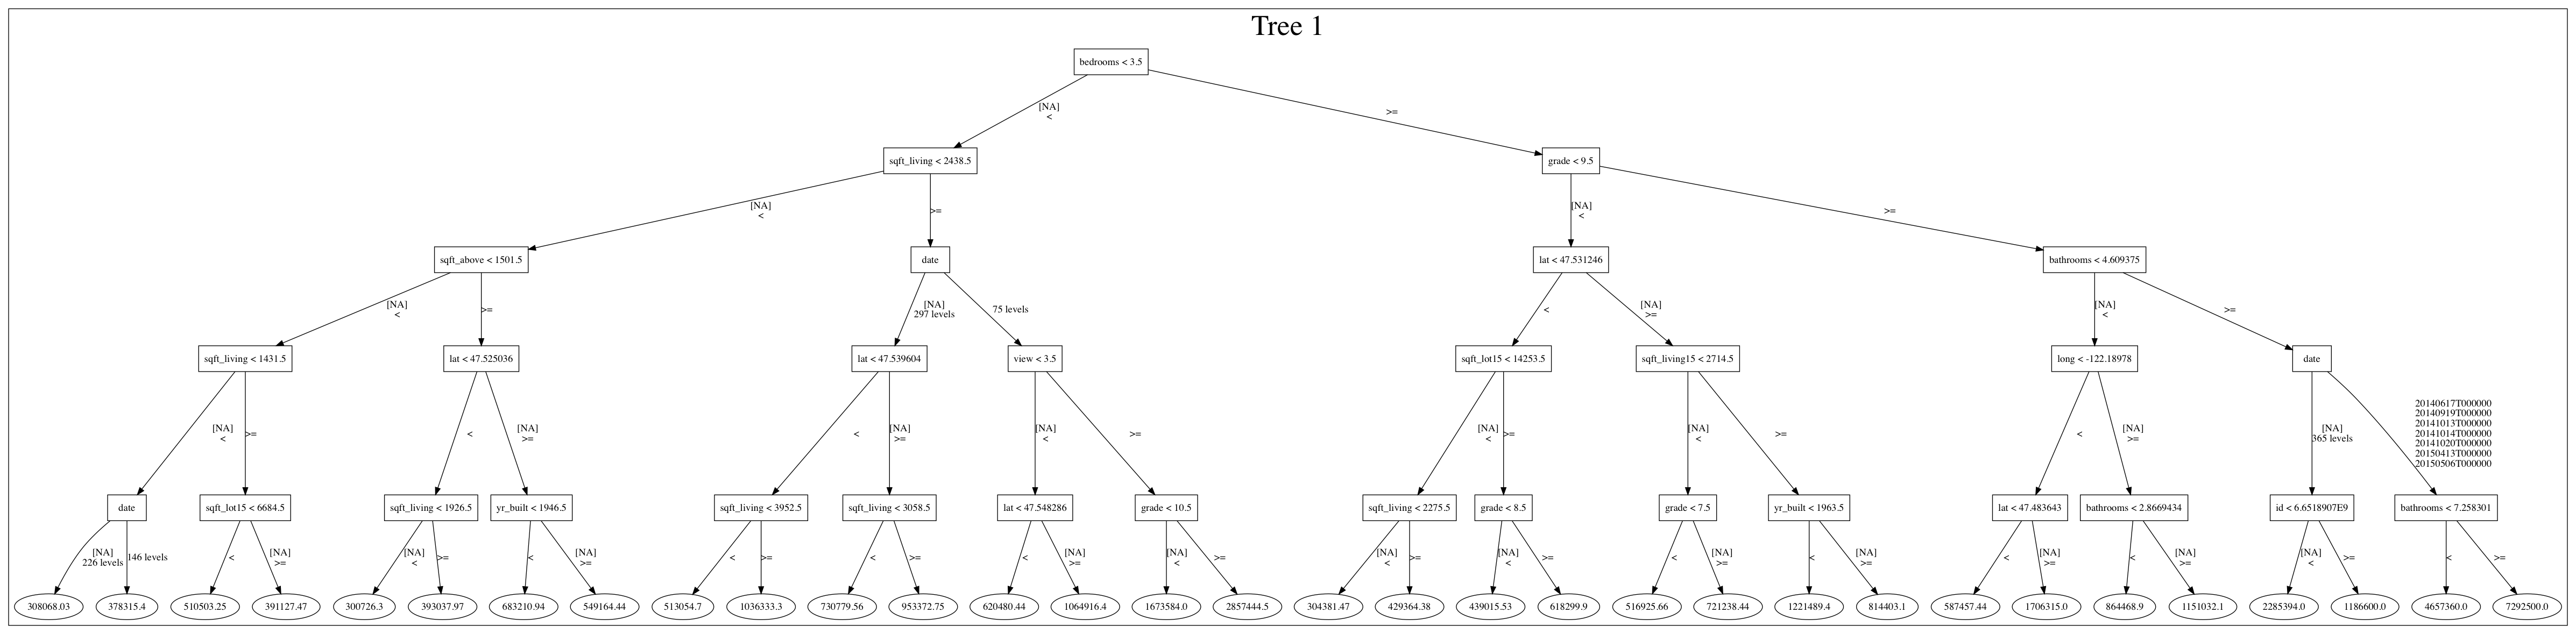

In [25]:
Image(filename='/Users/avkashchauhan/Downloads/image_001.png')

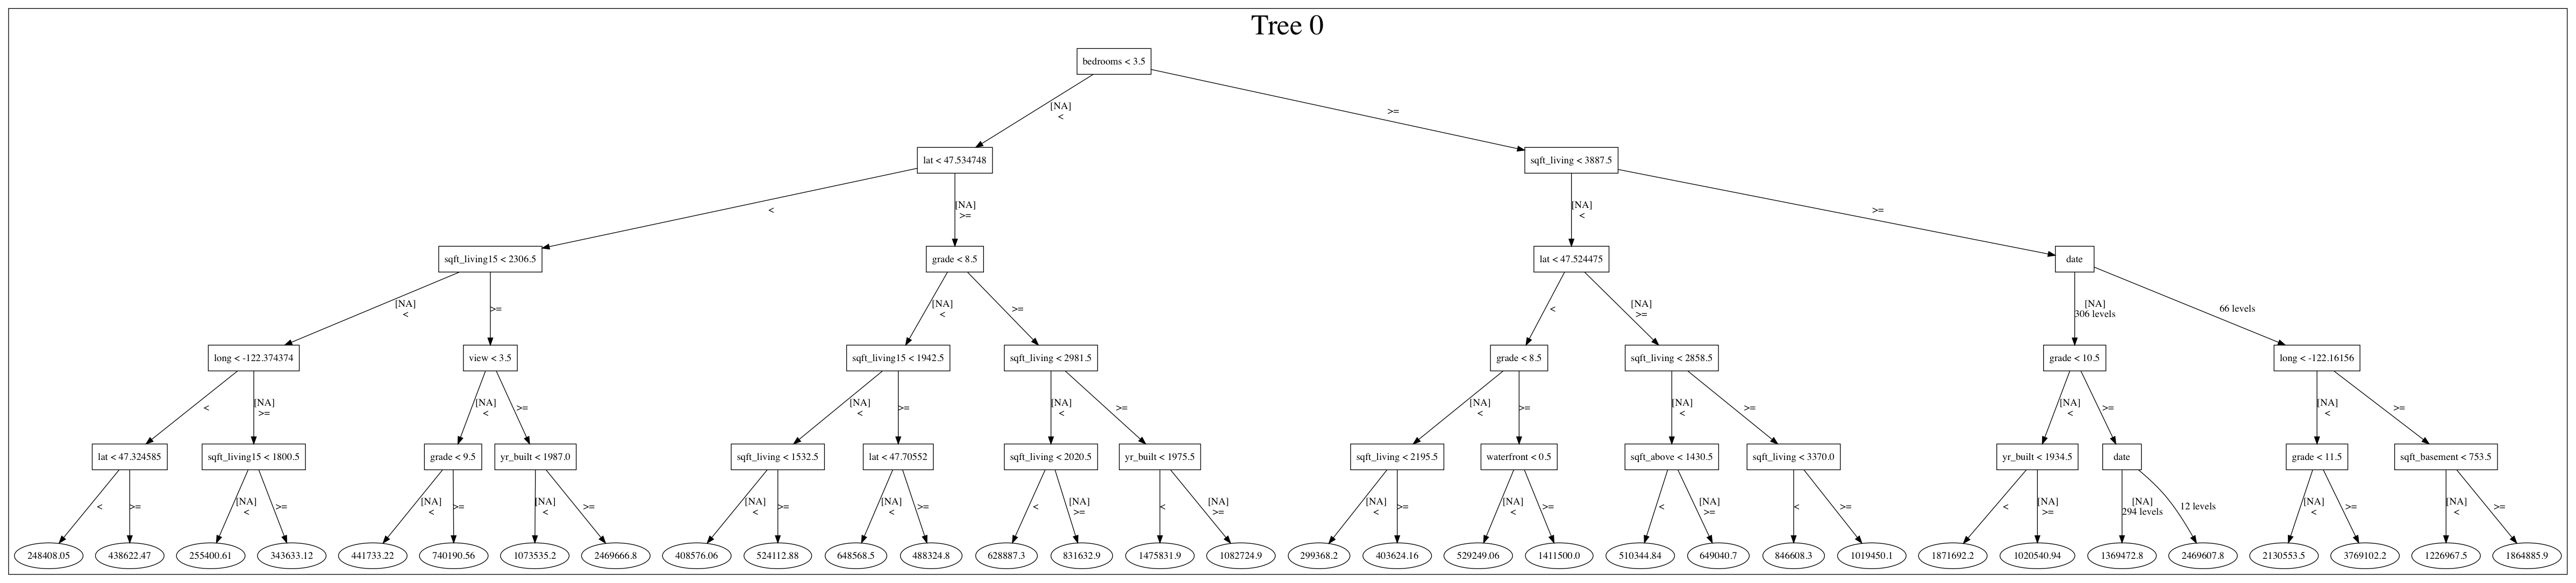

In [26]:
Image(filename='/Users/avkashchauhan/Downloads/image_000.png')

In [27]:
from graphviz import Digraph
from graphviz import Graph
dot = Digraph(comment='The Round Table')
g = Graph(format='png')
dot.render(gv_file_path, view=True)

'/Users/avkashchauhan/Downloads/drf_000.gv.pdf'